### Pair III

# Ajuste

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------
pd.options.display.max_columns = None

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Set2", 20)

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:
- Realizar el ajuste o ajustes de los modelos
- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [2]:
df = pd.read_pickle("../data/preprocesado.pkl")
df.sample(2)

,satisfaccion,genero,cliente,viaje,clase,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,edad,distancia,retraso_salida
9737,1,1,0,0,0,3,3,3,3,5,4,5,4,4,4,4,4,4,4,1.889773,-1.019799,-0.479852
89554,1,0,0,1,1,3,3,3,3,3,4,4,4,4,4,4,3,4,4,0.368538,0.194157,-0.479852


```Realizamos el modelo con variables codificadas y estandarizadas```

Separamos los datos

In [3]:
# separamos los datos en X e y

X1 = df.drop("satisfaccion", axis = 1)
y1 = df["satisfaccion"]

In [4]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

X1.head()

,genero,cliente,viaje,clase,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,edad,distancia,retraso_salida
0,1,0,0,0,0,0,0,2,2,4,2,3,3,0,3,5,3,2,1.691351,-1.769313,-0.479852
1,0,0,0,1,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.500820,0.578523,-0.479852
2,1,0,0,0,0,0,0,3,2,0,2,2,3,3,4,4,4,2,-1.615680,0.230458,-0.479852
3,1,0,0,0,0,0,0,3,3,4,3,1,4,0,1,4,1,3,1.360648,-1.387082,-0.479852
4,1,0,0,0,0,0,0,3,4,3,4,2,2,0,2,4,2,5,2.022054,-1.674289,-0.479852


In [5]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

y1.head()

0    1
1    1
2    1
3    1
4    1
Name: satisfaccion, dtype: category
Categories (2, int64): [0, 1]

Train-Test split

In [6]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42) 

Ajuste y predicción del modelo

In [7]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [8]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
21413,1,1,Train
7284,0,0,Train
86080,0,1,Train
59842,0,0,Train
69486,0,0,Train


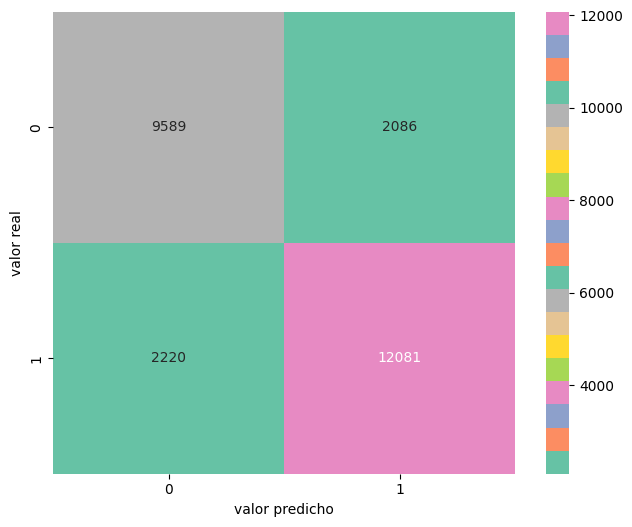

In [9]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (8, 6))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = qualitative_colors)

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.savefig("../graficas/03_ajuste_cod_est.png")
plt.show()

En función de nuestra variable respuesta 'satisfaccion' encontramos:

- 12081: valor predicho 1 valor real 1 (rosa) (verdadero positivo): se ha predicho que hay 12081 clientes satisfechos que sí  están satisfechos.
  
- 9589: valor predicho 0 valor real 0 (gris) (verdadero negativo): se ha predicho que hay 9589 clientes insatisfechos que  están insatisfechos.
  
- 2220: valor predicho 0 valor real 1 (verde abajo izd) (falso negativo): se ha predicho que hay 2220 clientes insatisfechos que  realmente sí están satisfechos.
  
- 2086: valor predicho 1 valor real 0 (verde arriba dch) (falso positivo): se ha predicho que hay 2056 clientes satisfechos que  realmente no están satisfechos, es decir, están insatisfechos.

Preferimos el error de tipo 2 Falso Negativo, preferimos predecir que hay 2220 insatisfechos que en la realidad sí están satisfechos.

In [10]:
df.to_pickle("../data/ajuste.pkl")